In [1]:
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report

In [2]:
#import dataframe 
df=pd.read_csv('Salaries.csv', low_memory=False)

In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [5]:
#check shape of dataframe
df.shape

(148654, 13)

In [6]:
#general info's of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [7]:
#how many null values per column
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

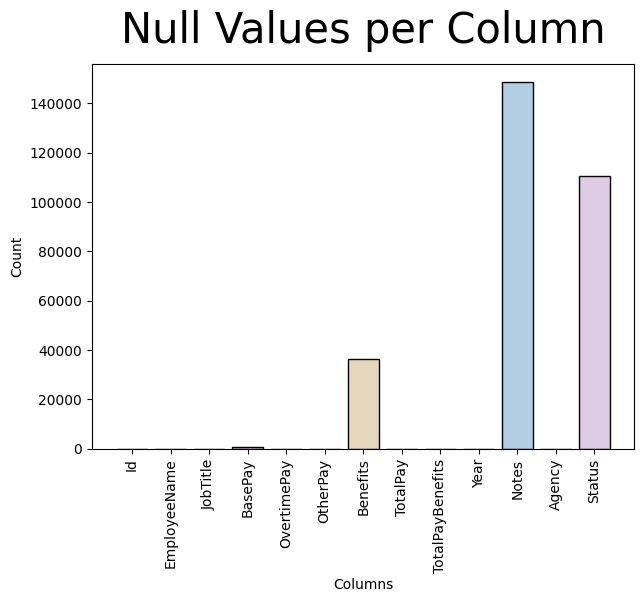

In [8]:
pastel1=plt.get_cmap('Pastel1')
plt.figure(figsize = (7, 5))
plt.title('Null Values per Column', fontsize=30, pad=15)
plt.bar(x=df.isnull().sum().index, height=df.isnull().sum(), color=pastel1.colors, edgecolor='black')
plt.xlabel('Columns') 
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [9]:
#create a mask to filter the "not provided" values
mask=(df!='Not Provided')&(df!='Not provided')
df=df[mask]

In [10]:
#check for duplicates
df.duplicated().sum()

0

In [11]:
#check for duplicates for EmployeeName
df['EmployeeName'].duplicated().sum()
#some employees have wages registered in different years

37844

In [12]:
#standardize employee names
df['EmployeeName']=df['EmployeeName'].apply(lambda x:str(x))
df['EmployeeName']=df['EmployeeName'].apply(lambda x:x.title())
df['EmployeeName'].head()

0       Nathaniel Ford
1         Gary Jimenez
2       Albert Pardini
3    Christopher Chong
4      Patrick Gardner
Name: EmployeeName, dtype: object

In [13]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [14]:
print(df['Agency'].unique())
#"Agency" column only it can only take one value (since dataset is about San Francisco) so we can drop it

['San Francisco']


In [15]:
#drop the columns that aren't needed
#notes only has null values, and Id isn't needed since we have the index
df=df.drop(columns=['Notes', 'Id', 'Agency'])

In [16]:
#check how the Benefits column is calculated with the existing values
mask=df['Benefits'].notna()
#pick a person that we know has the Benefits value
p_with_benefits=df[mask].reset_index().loc[0]
#check that the benefits column is calculated by subracting TotalPay to TotalPayBenefits
round((p_with_benefits['TotalPayBenefits']-p_with_benefits['TotalPay']))==round(float(p_with_benefits['Benefits']))
#we can assume that this is the case for everyone

True

In [17]:
#fill na's of the "Benefits" column with the relative TotalPayBenefits-TotalPay
df['Benefits']=(df['TotalPayBenefits']-df['TotalPay'])
benefits_null_values=df['Benefits'].isnull().sum()
print(f'Benefits column now has: {benefits_null_values} null values')

Benefits column now has: 0 null values


In [18]:
#we know that BasePay only has 605 null values that we can drop since not much information is lost
df=df.dropna(subset=['BasePay', 'EmployeeName'])

In [19]:
#change the data type of 'BasePay', 'OvertimePay', 'OtherPay' to float
for col in ['BasePay', 'OvertimePay', 'OtherPay']:
    df[col]=df[col].astype(float)

In [20]:
#reset index
df=df.reset_index(drop=True)

In [21]:
#check how the dataframe has changed
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148045 entries, 0 to 148044
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148045 non-null  object 
 1   JobTitle          148045 non-null  object 
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148045 non-null  float64
 4   OtherPay          148045 non-null  float64
 5   Benefits          148045 non-null  float64
 6   TotalPay          148045 non-null  float64
 7   TotalPayBenefits  148045 non-null  float64
 8   Year              148045 non-null  int64  
 9   Status            38119 non-null   object 
dtypes: float64(6), int64(1), object(3)
memory usage: 11.3+ MB


In [22]:
#all the null values, except for the Status column, have been dropped
df.isnull().sum()

EmployeeName             0
JobTitle                 0
BasePay                  0
OvertimePay              0
OtherPay                 0
Benefits                 0
TotalPay                 0
TotalPayBenefits         0
Year                     0
Status              109926
dtype: int64

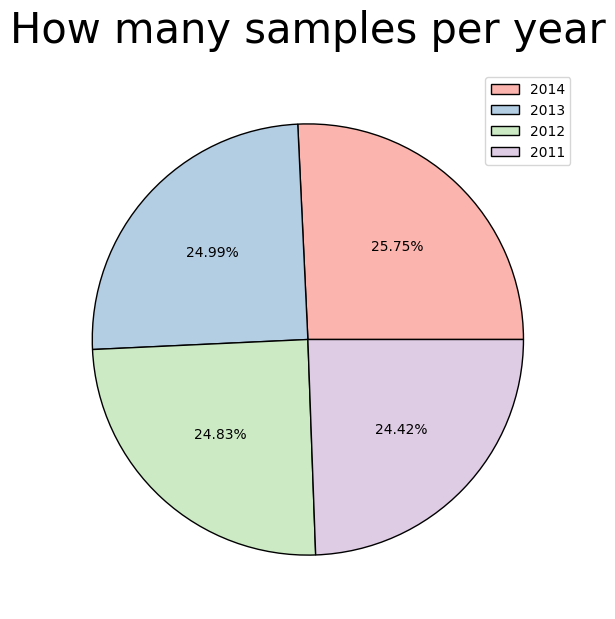

In [23]:
plt.figure(figsize=(7,7))
plt.title('How many samples per year', fontsize=30, pad=20)
plt.pie(df['Year'].value_counts(), autopct='%.2f%%', colors=pastel1.colors, wedgeprops={'edgecolor':'black'})
plt.legend(labels=df['Year'].value_counts().index)
plt.show()

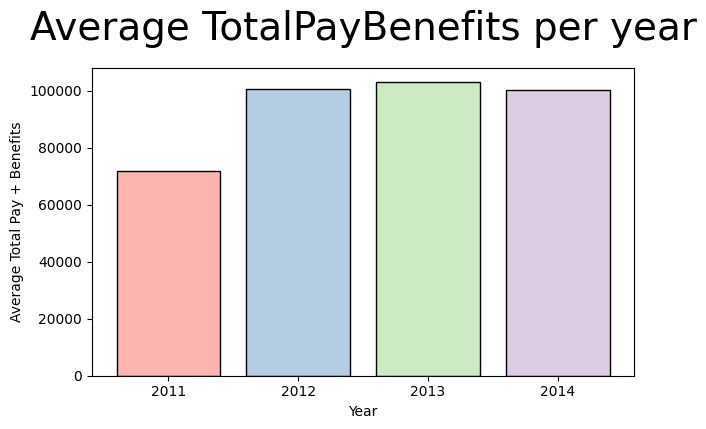

In [24]:
mean_pay_per_year=df.groupby('Year')['TotalPayBenefits'].mean()
plt.figure(figsize=(7, 4))
plt.title('Average TotalPayBenefits per year', fontsize=28, pad=20)
plt.bar(x=mean_pay_per_year.index, height=mean_pay_per_year, color=pastel1.colors, edgecolor='black')
plt.xticks(range(2011, 2015))
plt.xlabel('Year')
plt.ylabel('Average Total Pay + Benefits')
plt.show()

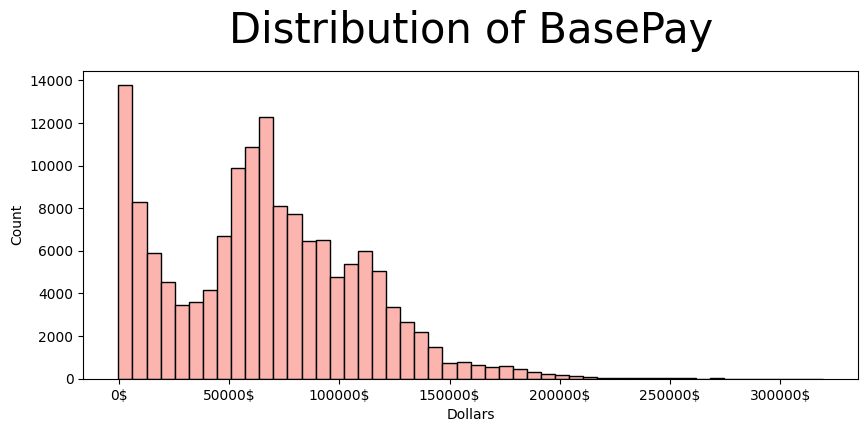

In [25]:
x_ticks=[str(x)+'$' for x in range(0,300001,50000)]
plt.figure(figsize=(10, 4))
plt.title('Distribution of BasePay', fontsize=30, pad=20)
plt.hist(df['BasePay'], bins=50, color=pastel1.colors[0], edgecolor='Black')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.xticks(range(0,300001,50000), labels=x_ticks)
plt.show()

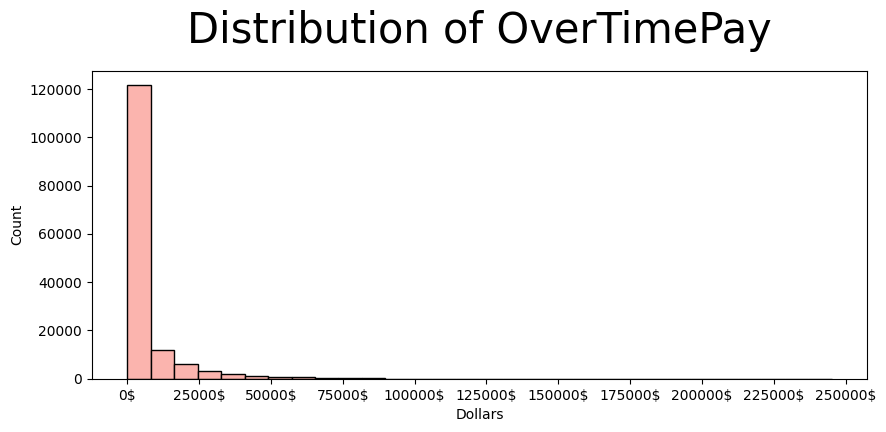

In [26]:
x_ticks=[str(x)+'$' for x in range(0,250001,25000)]
plt.figure(figsize=(10, 4))
plt.title('Distribution of OverTimePay', fontsize=30, pad=20)
plt.hist(df['OvertimePay'], bins=30, color=pastel1.colors[0], edgecolor='Black')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.xticks(range(0,250001,25000), labels=x_ticks)
plt.show()

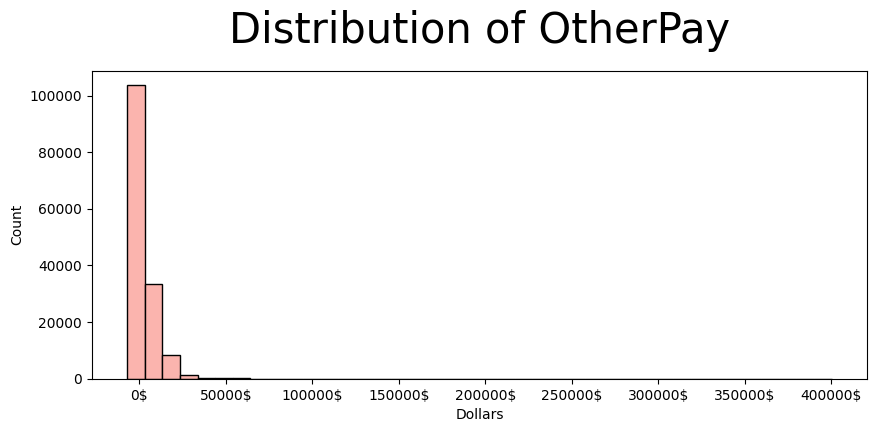

In [27]:
x_ticks=[str(x)+'$' for x in range(0,400001,50000)]
plt.figure(figsize=(10, 4))
plt.title('Distribution of OtherPay', fontsize=30, pad=20)
plt.hist(df['OtherPay'], bins=40, color=pastel1.colors[0], edgecolor='Black')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.xticks(range(0,400001,50000), labels=x_ticks)
plt.show()

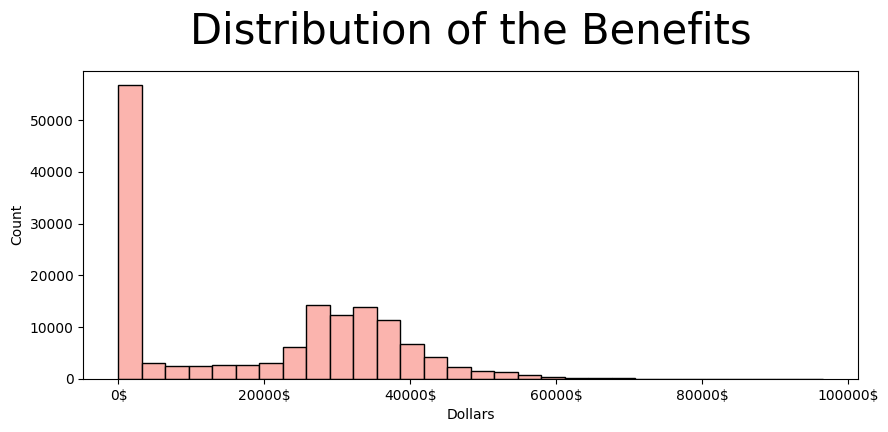

In [28]:
x_ticks=[str(x)+'$' for x in range(0,100001,20000)]
plt.figure(figsize=(10, 4))
plt.title('Distribution of the Benefits', fontsize=30, pad=20)
plt.hist(df['Benefits'], bins=30, color=pastel1.colors[0], edgecolor='Black')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.xticks(range(0,100001,20000), labels=x_ticks)
plt.show()

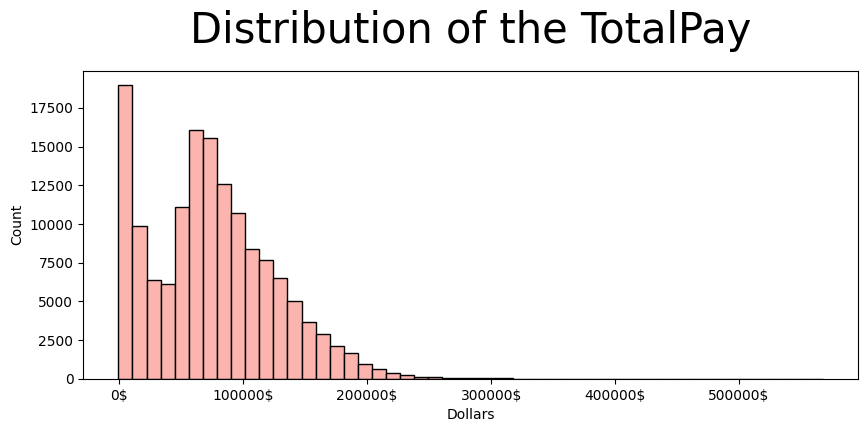

In [29]:
x_ticks=[str(x)+'$' for x in range(0,500001,100000)]
plt.figure(figsize=(10, 4))
plt.title('Distribution of the TotalPay', fontsize=30, pad=20)
plt.hist(df['TotalPay'], bins=50, color=pastel1.colors[0], edgecolor='Black')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.xticks(range(0,500001,100000), labels=x_ticks)
plt.show()

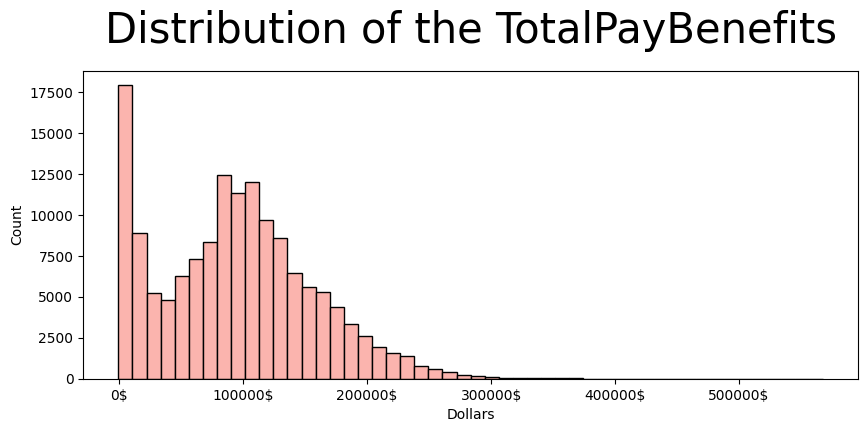

In [30]:
x_ticks=[str(x)+'$' for x in range(0,500001,100000)]
plt.figure(figsize=(10, 4))
plt.title('Distribution of the TotalPayBenefits', fontsize=30, pad=20)
plt.hist(df['TotalPayBenefits'], bins=50, color=pastel1.colors[0], edgecolor='Black')
plt.xlabel('Dollars')
plt.ylabel('Count')
plt.xticks(range(0,500001,100000), labels=x_ticks)
plt.show()

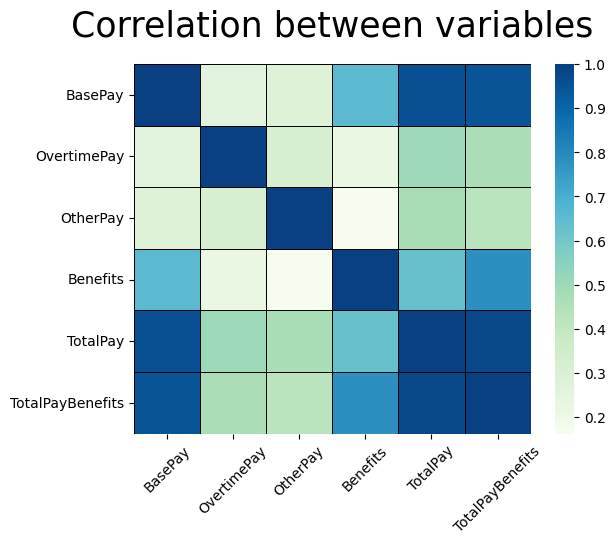

In [31]:
df_corr=df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits']].corr()
plt.title('Correlation between variables', fontsize=25, pad=20)
sns.heatmap(df_corr, cmap='GnBu', linecolor='black', linewidths=0.5)
plt.xticks(rotation=45)
plt.show()

C:\Users\Marco\AppData\Local\Temp\ipykernel_20568\1239043761.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Status_Enc']=df['Status_Enc'].replace({'PT':0, 'FT':1})


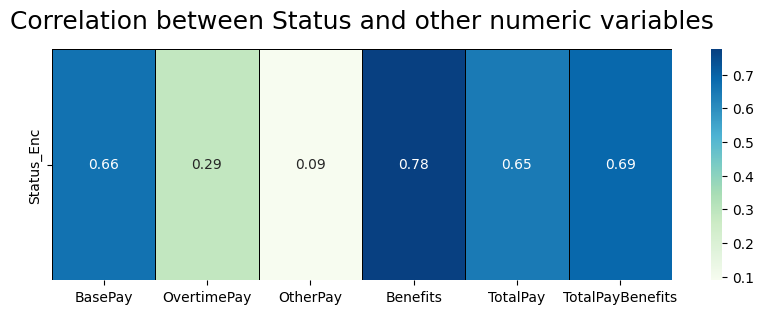

In [32]:
#create a new column with the Status values encoded
df['Status_Enc']=df['Status']
df['Status_Enc']=df['Status_Enc'].replace({'PT':0, 'FT':1})

df_corr=df[['BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Status_Enc']].corr()
plt.figure(figsize=(10,3))
plt.title('Correlation between Status and other numeric variables', fontsize=18, pad=15)
sns.heatmap(df_corr[['Status_Enc']][:-1].T, cmap='GnBu', linecolor='black', linewidths=0.5, annot=True)
plt.show()

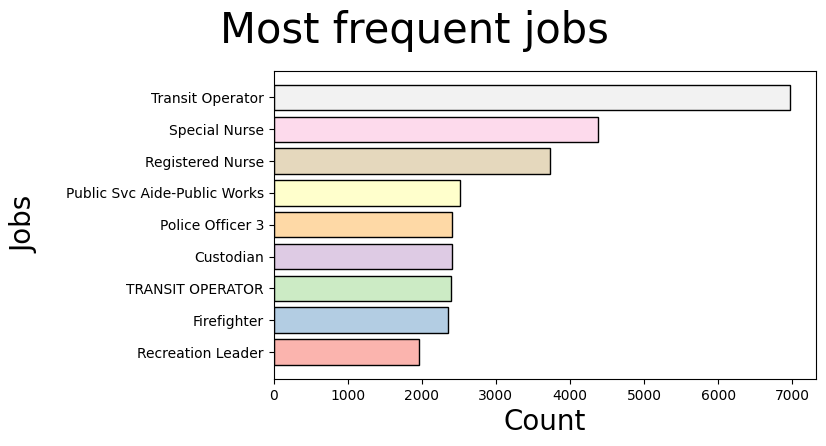

In [33]:
frequent_10_jobs = df['JobTitle'].value_counts()[:9].sort_values()
plt.figure(figsize=(7, 4))
plt.title('Most frequent jobs', fontsize=30, pad=20, x=0.26)
plt.barh(y=frequent_10_jobs.index, width=frequent_10_jobs, color=pastel1.colors, edgecolor='black')
plt.xlabel('Count', fontsize=20)
plt.ylabel('Jobs', fontsize=20, labelpad=20)
plt.show()

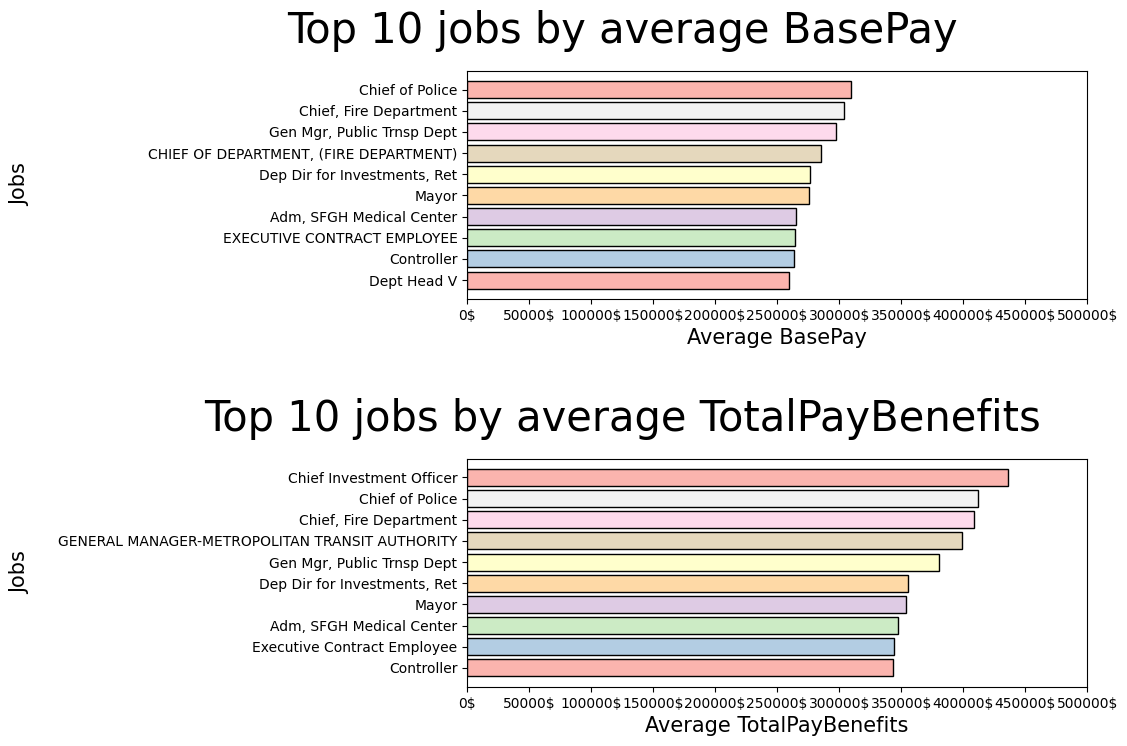

In [34]:
top_10_jobs_basepay = df.groupby('JobTitle')['BasePay'].mean().sort_values()[-10:]
top_10_jobs_tpbenefits = df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values()[-10:]
x_ticks=[str(x)+'$' for x in range(0, 500001, 50000)]
fig,axs=plt.subplots(2,1,figsize=(8,8))
plt.subplots_adjust(hspace=0.7)
axs[0].set_title('Top 10 jobs by average BasePay', fontsize=30, pad=20, x=0.25)
axs[0].barh(y=top_10_jobs_basepay.index, width=top_10_jobs_basepay, color=pastel1.colors, edgecolor='black')
axs[0].set_xlabel('Average BasePay', fontsize=15)
axs[0].set_ylabel('Jobs', fontsize=15, labelpad=85)
axs[0].set_xticks(ticks=range(0, 500001, 50000), labels=x_ticks)
axs[1].set_title('Top 10 jobs by average TotalPayBenefits', fontsize=30, pad=20, x=0.25)
axs[1].barh(y=top_10_jobs_tpbenefits.index, width=top_10_jobs_tpbenefits, color=pastel1.colors, edgecolor='black')
axs[1].set_xlabel('Average TotalPayBenefits', fontsize=15)
axs[1].set_ylabel('Jobs', fontsize=15, labelpad=20)
axs[1].set_xticks(ticks=range(0, 500001, 50000), labels=x_ticks)
plt.show()

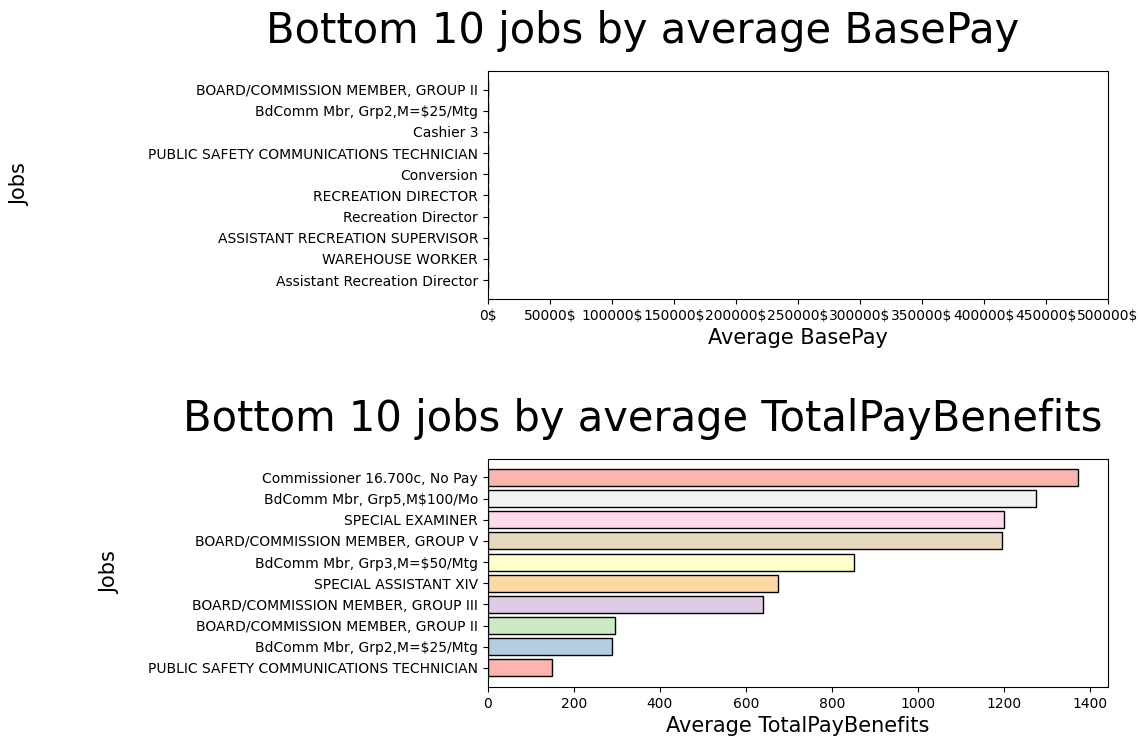

In [35]:
# DA SISTEMARE!!

bot_10_jobs_basepay = df.groupby('JobTitle')['BasePay'].mean().sort_values()[:10]
bot_10_jobs_tpbenefits = df.groupby('JobTitle')['TotalPayBenefits'].mean().sort_values()[:10]
x_ticks=[str(x)+'$' for x in range(0, 500001, 50000)]
fig,axs=plt.subplots(2,1,figsize=(8,8))
plt.subplots_adjust(hspace=0.7)
axs[0].set_title('Bottom 10 jobs by average BasePay', fontsize=30, pad=20, x=0.25)
axs[0].barh(y=bot_10_jobs_basepay.index, width=bot_10_jobs_basepay, color=pastel1.colors, edgecolor='black')
axs[0].set_xlabel('Average BasePay', fontsize=15)
axs[0].set_ylabel('Jobs', fontsize=15, labelpad=85)
axs[0].set_xticks(ticks=range(0, 500001, 50000), labels=x_ticks)
axs[1].set_title('Bottom 10 jobs by average TotalPayBenefits', fontsize=30, pad=20, x=0.25)
axs[1].barh(y=bot_10_jobs_tpbenefits.index, width=bot_10_jobs_tpbenefits, color=pastel1.colors, edgecolor='black')
axs[1].set_xlabel('Average TotalPayBenefits', fontsize=15)
axs[1].set_ylabel('Jobs', fontsize=15, labelpad=20)
plt.show()

In [36]:
#some statistics about the wages
print('Mean salary: ', round(df['TotalPayBenefits'].mean()), '$')
print('Median salary: ', round(df['TotalPayBenefits'].median()), '$')
print('Mode salary: ', round(df['TotalPayBenefits'].mode()[0]), '$')
print('Minimum salary: ', round(df['TotalPayBenefits'].min()), '$')
print('Maximum salary: ', round(df['TotalPayBenefits'].max()), '$')
print('Standard deviation of salaries: ', round(df['TotalPayBenefits'].std()), '$')

Mean salary:  94038 $
Median salary:  92676 $
Mode salary:  123291 $
Minimum salary:  -618 $
Maximum salary:  567595 $
Standard deviation of salaries:  62683 $


In [37]:
#for the prediction part, we can't use rows with null values in the status column, so we'll drop them
df_clean=df.dropna()
df_clean['Status_Enc'].value_counts()

Status_Enc
1.0    22334
0.0    15785
Name: count, dtype: int64

In [38]:
#create X and y for undersampling
X=df_clean.drop('Status_Enc', axis = 1)
y=df_clean['Status_Enc']

In [39]:
#undersample X and y
rus=RandomUnderSampler()
X_res, y_res=rus.fit_resample(X,y)

In [40]:
#re-create the dataframe with X and y undersampled
df_clean=pd.concat([pd.DataFrame(X_res, columns=X.columns), pd.Series(y_res, name='Status_Enc')], axis=1)

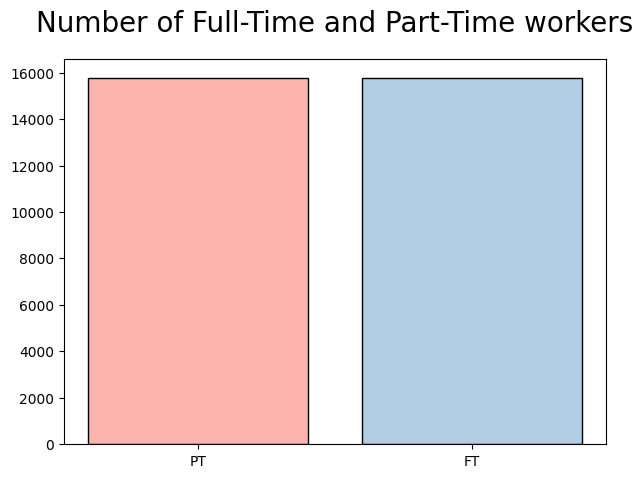

In [41]:
plt.figure(figsize=(7,5))
plt.title('Number of Full-Time and Part-Time workers', fontsize=20, pad=20)
plt.bar(x=df_clean['Status'].value_counts().index, height=df_clean['Status'].value_counts(), color=pastel1.colors, edgecolor='black')
plt.show()

In [42]:
#drop non-numeric columns+numeric columns that aren't needed
df_num=df_clean.drop(columns=['Status', 'EmployeeName', 'JobTitle', 'Year'])

In [43]:
#create X and y for train and test data
X=df_num.drop('Status_Enc', axis = 1)
y=df_num['Status_Enc']

In [44]:
#split X and y for train and test
X_tr, X_te, y_tr, y_te=train_test_split(X, y, test_size=0.3)

In [45]:
#predict the Status for X test
clf=LogisticRegression()
clf.fit(X_tr, y_tr)
y_pred=clf.predict(X_te)

In [46]:
#check the scores for the prediction
print(classification_report(y_te, y_pred))
f1_s=f1_score(y_te, y_pred, average=None, labels=[0, 1])
print(f'F1 score: {str(round(f1_s[0],2))}%, {str(round(f1_s[1],2))}%')

              precision    recall  f1-score   support

         0.0       0.97      0.87      0.92      4709
         1.0       0.88      0.98      0.93      4762

    accuracy                           0.92      9471
   macro avg       0.93      0.92      0.92      9471
weighted avg       0.93      0.92      0.92      9471

F1 score: 0.92%, 0.93%


In [47]:
#we can now use our trained model to predict the status that were null
X=df.drop(['Status', 'Status_Enc', 'EmployeeName', 'JobTitle', 'Year'], axis=1)
df['Status_Enc']=clf.predict(X)
df['Status']=df['Status_Enc'].replace({0:'PT', 1:'FT'})
df=df.drop('Status_Enc', axis=1)

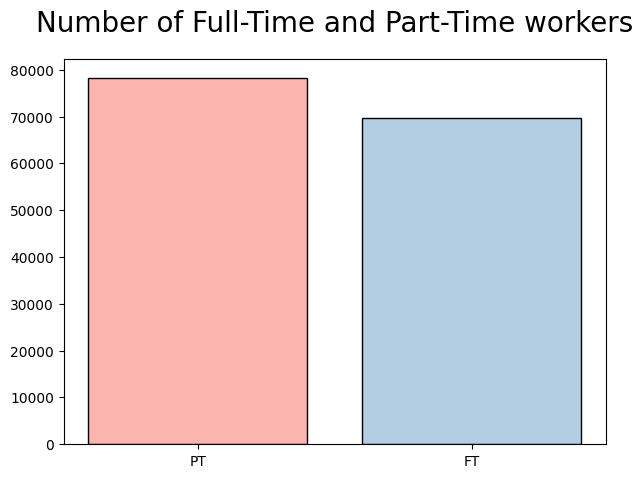

In [48]:
#we can now see the distribution of Part-Time and Full-Time workers in San Francisco
#we expect roughly 92% of the values to be right
plt.figure(figsize=(7,5))
plt.title('Number of Full-Time and Part-Time workers', fontsize=20, pad=20)
plt.bar(x=df['Status'].value_counts().index, height=df['Status'].value_counts(), color=pastel1.colors, edgecolor='black')
plt.show()

In [49]:
#double-check to see if we ended up with the full dataset filled with our predictions
print(df.shape)
df.info()

(148045, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148045 entries, 0 to 148044
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   EmployeeName      148045 non-null  object 
 1   JobTitle          148045 non-null  object 
 2   BasePay           148045 non-null  float64
 3   OvertimePay       148045 non-null  float64
 4   OtherPay          148045 non-null  float64
 5   Benefits          148045 non-null  float64
 6   TotalPay          148045 non-null  float64
 7   TotalPayBenefits  148045 non-null  float64
 8   Year              148045 non-null  int64  
 9   Status            148045 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 11.3+ MB
